All checkpoints are saved under /DraperLab/VGG_net/vgg-net/CHECKPOINTS

# 1. Make convolutional layers constant
## Checkpoint:
1/vgg-net<br \>
## Parameters:
learning_rate = 1e-2<br \>
decay = 1e-2<br \>
lr = (learning_rate * 1.0/(1.0 + decay*step))<br \>
droput = 0.5<br \>
10000 iterations (20 epochs)<br \> 
## Training and validation data:
Training data in 200 batches, each image from 1 class<br \>
Training images were randomly processed: resize from 64 to 75, then crop 64, randomly flip horizontally
Test data on all validation images<br \>
Training acc was calculated on one batch while training (cropped image)<br \>
## Result:
Trainin_actual acc: 30% <br \>
test acc: 28%

# 2. Make convolutional layers constant_further training
## Checkpoint:
2/vgg-net<br \>
## Parameters:
Read checkpoint from #1 <br />
learning_rate = 1e-3<br \>
decay = 1e-3<br \>
lr = (learning_rate * 1.0/(1.0 + decay*step))<br \>
droput = 0.5<br \>
10000 iterations (20 epochs)<br \> 
## Training and validation data:
Training data in 200 batches, each image from 1 class<br \>
Training images were randomly processed: resize from 64 to 75, then crop 64, randomly flip horizontally
Test data on all validation images<br \>
Training acc was calculated on one batch while training (cropped image)<br \>
## Result:
Trainin_actual acc: 36% <br \>
test acc: 33%

# 3. Start to train convolutional layers
## Checkpoint:
3/vgg-net<br \>
## Parameters:
Read checkpoint from #1
learning_rate = 1e-3<br \>
decay = 1e-3<br \>
lr = (learning_rate * 1.0/(1.0 + decay*step))<br \>
droput = 0.5<br \>
10000 iterations (20 epochs)<br \> 
## Training and validation data:
Training data in 200 batches, each image from 1 class<br \>
Training images were randomly processed: resize from 64 to 75, then crop 64, randomly flip horizontally
Test data on all validation images<br \>
Training acc was calculated on one batch while training (cropped image)<br \>
## Result:
Trainin_actual acc: 60% <br \>
test acc: 50%

# 4. Train convolutional layers (from beginning)
## Checkpoint:
4/vgg-net<br \>
## Parameters:
learning_rate = 1e-2/1e-3<br \>
decay = 1e-3<br \>
lr = (learning_rate * 1.0/(1.0 + decay*step))<br \>
droput = 0.5<br \>
10000 iterations (20 epochs)<br \> 
## Training and validation data:
Training data in 200 batches, each image from 1 class<br \>
Training images were randomly processed: resize from 64 to 75, then crop 64, randomly flip horizontally
Test data on all validation images<br \>
Training acc was calculated on one batch while training (cropped image)<br \>
## Result:
Nan

# 5. Train convolutional layers (from beginning)
## Checkpoint:
5/vgg-net<br \>
## Parameters:
learning_rate = 1e-4<br \>
decay = 0<br \>
lr = (learning_rate * 1.0/(1.0 + decay*step))<br \>
droput = 0.5<br \>
10000 iterations (20 epochs)<br \> 
## Training and validation data:
Training data in 200 batches, each image from 1 class<br \>
Training images were randomly processed: resize from 64 to 75, then crop 64, randomly flip horizontally
Test data on all validation images<br \>
Training acc was calculated on one batch while training (cropped image)<br \>
## Result:
~1% accuracy

# Analayze
## Initializing with weights from VGG16 trained on large ImageNet

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import cv2

In [2]:
xvalid = np.load('/s/red/a/nobackup/vision/jason/tinyImageNet/xvalid_tinyimgnet.npy')

In [2]:
class VGGNet:
    def __init__(self):
        train_conv = False
        self.parameters = []
        with tf.device('/gpu:0'):
            self.x = tf.placeholder(tf.float32, [None, 64, 64, 3])
            self.y_ = tf.placeholder(tf.float32, [None, 200])
            self.keep_prob = tf.placeholder(tf.float32)
            self.reg = 5e-4

            #Convolutional layer no 1
            self.W1_1 = tf.get_variable("W1_1", shape=[3,3,3,64], initializer=tf.contrib.layers.xavier_initializer(), trainable = train_conv)
            self.b1_1 = tf.Variable(tf.constant(0.01, shape=[64]), trainable = train_conv, name = 'b1_1')
            self.conv3_64 = tf.nn.conv2d(self.x, self.W1_1, strides = [1,1,1,1], padding='SAME')
            self.conv3_64_relu = tf.nn.relu(self.conv3_64 + self.b1_1)

            self.parameters += [self.W1_1, self.b1_1]

            # Convolutional layer no 2
            self.W1_2 = tf.get_variable("W1_2", shape=[3,3,64,64], initializer=tf.contrib.layers.xavier_initializer(), trainable = train_conv)
            self.b1_2 = tf.Variable(tf.constant(0.01, shape=[64]), trainable = train_conv, name = 'b1_2')
            self.conv3_64_2 = tf.nn.conv2d(self.conv3_64_relu, self.W1_2, strides=[1, 1, 1, 1], padding='SAME')
            self.conv3_64_2_relu = tf.nn.relu(self.conv3_64_2 + self.b1_2)

            self.parameters += [self.W1_2, self.b1_2]

            #Max pooling layer
            self.max_pool_2x2_1 = tf.nn.max_pool(self.conv3_64_2_relu, ksize=[1,2,2,1], strides = [1,2,2,1], padding='SAME')

            #current image dimensions:  32x32

            #convolutional layer no 3
            self.W2_1 = tf.get_variable("W2_1", shape=[3,3,64,128], initializer=tf.contrib.layers.xavier_initializer(), trainable = train_conv)
            self.b2_1 = tf.Variable(tf.constant(0.01, shape=[128]), trainable = train_conv, name='b2_1')
            self.conv3_128 = tf.nn.conv2d(self.max_pool_2x2_1, self.W2_1, strides = [1,1,1,1], padding='SAME')
            self.conv3_128_relu = tf.nn.relu(self.conv3_128 + self.b2_1)

            self.parameters += [self.W2_1, self.b2_1]

            # convolutional layer no 4
            self.W2_2 = tf.get_variable("W2_2", shape=[3,3,128,128], initializer=tf.contrib.layers.xavier_initializer(), trainable = train_conv)
            self.b2_2 = tf.Variable(tf.constant(0.01, shape=[128]), trainable = train_conv, name='b2_2')
            self.conv3_128_2 = tf.nn.conv2d(self.conv3_128_relu, self.W2_2, strides=[1, 1, 1, 1], padding='SAME')
            self.conv3_128_2_relu = tf.nn.relu(self.conv3_128_2 + self.b2_2)

            self.parameters += [self.W2_2, self.b2_2]

            #Max pooling layer
            self.max_pool_2x2_2 = tf.nn.max_pool(self.conv3_128_2_relu, ksize=[1,2,2,1], strides = [1,2,2,1], padding='SAME')

            #current image dimensions: 16x16


            # convolutional layer No5
            self.W3_1 = tf.get_variable("W3_1", shape=[3,3,128,256], initializer=tf.contrib.layers.xavier_initializer(), trainable = train_conv)
            self.b3_1 = tf.Variable(tf.constant(0.01, shape=[256]), trainable = train_conv, name='b3_1')
            self.conv3_256 = tf.nn.conv2d(self.max_pool_2x2_2, self.W3_1, strides = [1,1,1,1], padding='SAME')
            self.conv3_256_relu = tf.nn.relu(self.conv3_256 + self.b3_1)

            self.parameters += [self.W3_1, self.b3_1]

            # convolutional layer No6
            self.W3_2 = tf.get_variable("W3_2", shape=[3,3,256,256], initializer=tf.contrib.layers.xavier_initializer(), trainable = train_conv)
            self.b3_2 = tf.Variable(tf.constant(0.01, shape=[256]), trainable = train_conv, name= 'b3_2')
            self.conv3_256_2 = tf.nn.conv2d(self.conv3_256_relu, self.W3_2, strides=[1, 1, 1, 1], padding='SAME')
            self.conv3_256_2_relu = tf.nn.relu(self.conv3_256_2 + self.b3_2)

            self.parameters += [self.W3_2, self.b3_2]

            #convolutional layer No7
            self.W3_3 = tf.get_variable("W3_3", shape=[3,3,256,256], initializer=tf.contrib.layers.xavier_initializer(), trainable = train_conv)
            self.b3_3 = tf.Variable(tf.constant(0.01, shape=[256]), trainable = train_conv, name='b3_3')
            self.conv3_256_3 = tf.nn.conv2d(self.conv3_256_2_relu, self.W3_3, strides = [1,1,1,1], padding='SAME')
            self.conv3_256_3_relu = tf.nn.relu(self.conv3_256_3 + self.b3_3)

            self.parameters += [self.W3_3, self.b3_3]

            #Max pooling layer
            self.max_pool_2x2_3 = tf.nn.max_pool(self.conv3_256_3_relu, ksize=[1,2,2,1], strides = [1,2,2,1], padding='SAME')

            #current image dimensions: 8x8


            # convolutional layer No8
            self.W4_1 = tf.get_variable("W4_1", shape=[3,3,256,512], initializer=tf.contrib.layers.xavier_initializer(), trainable = train_conv)
            self.b4_1 = tf.Variable(tf.constant(0.01, shape=[512]), trainable = train_conv)
            self.conv3_512 = tf.nn.conv2d(self.max_pool_2x2_3, self.W4_1, strides = [1,1,1,1], padding='SAME')
            self.conv3_512_relu = tf.nn.relu(self.conv3_512 + self.b4_1)

            self.parameters += [self.W4_1, self.b4_1]

            # convolutional layer No9
            self.W4_2 = tf.get_variable("W4_2", shape=[3,3,512,512], initializer=tf.contrib.layers.xavier_initializer(), trainable = train_conv)
            self.b4_2 = tf.Variable(tf.constant(0.01, shape=[512]), trainable = train_conv, name='b4_2')
            self.conv3_512_2 = tf.nn.conv2d(self.conv3_512_relu, self.W4_2, strides=[1, 1, 1, 1], padding='SAME')
            self.conv3_512_2_relu = tf.nn.relu(self.conv3_512_2 + self.b4_2)

            self.parameters += [self.W4_2, self.b4_2]

            #convolutional layer No10
            self.W4_3 = tf.get_variable("W4_3", shape=[3,3,512,512], initializer=tf.contrib.layers.xavier_initializer(), trainable = train_conv)
            self.b4_3 = tf.Variable(tf.constant(0.01, shape=[512]), trainable = train_conv, name='b4_3')
            self.conv3_512_3 = tf.nn.conv2d(self.conv3_512_2_relu, self.W4_3, strides = [1,1,1,1], padding='SAME')
            self.conv3_512_3_relu = tf.nn.relu(self.conv3_512_3 + self.b4_3)

            self.parameters += [self.W4_3, self.b4_3]

            #Max pooling layer
            self.max_pool_2x2_4 = tf.nn.max_pool(self.conv3_512_3_relu, ksize=[1,2,2,1], strides = [1,2,2,1], padding='SAME')

            #current image dimensions: 4x4



            # convolutional layer No11
            self.W5_1 = tf.get_variable("W5_1", shape=[3,3,512,512], initializer=tf.contrib.layers.xavier_initializer(), trainable = train_conv)
            self.b5_1 = tf.Variable(tf.constant(0.1, shape=[512]), trainable = train_conv, name='b5_1')
            self.conv3_512_4 = tf.nn.conv2d(self.max_pool_2x2_4, self.W5_1, strides = [1,1,1,1], padding='SAME')
            self.conv3_512_4_relu = tf.nn.relu(self.conv3_512_4 + self.b5_1)

            self.parameters += [self.W5_1, self.b5_1]

            # convolutional layer No12
            self.W5_2 = tf.get_variable("W5_2", shape=[3,3,512,512], initializer=tf.contrib.layers.xavier_initializer(), trainable = train_conv)
            self.b5_2 = tf.Variable(tf.constant(0.1, shape=[512]), trainable = train_conv,name='b5_2')
            self.conv3_512_5 = tf.nn.conv2d(self.conv3_512_4_relu, self.W5_2, strides=[1, 1, 1, 1], padding='SAME')
            self.conv3_512_5_relu = tf.nn.relu(self.conv3_512_5 + self.b5_2)

            self.parameters += [self.W5_2, self.b5_2]

            #convolutional layer No13
            self.W5_3 = tf.get_variable("W5_3", shape=[3,3,512,512], initializer=tf.contrib.layers.xavier_initializer(), trainable = train_conv)
            self.b5_3 = tf.Variable(tf.constant(0.1, shape=[512]), trainable = train_conv, name='b5_3')
            self.conv3_512_6 = tf.nn.conv2d(self.conv3_512_5_relu, self.W5_3, strides = [1,1,1,1], padding='SAME')
            self.conv3_512_6_relu = tf.nn.relu(self.conv3_512_6 + self.b5_3)

            self.parameters += [self.W5_3, self.b5_3]

            #Max pooling layer
            self.max_pool_2x2_5 = tf.nn.max_pool(self.conv3_512_6_relu, ksize=[1,2,2,1], strides = [1,2,2,1], padding='SAME')

            #Fully connected layer 1
            W_fc1 = tf.get_variable("W_fc1", shape=[2*2*512, 4096], initializer=tf.contrib.layers.xavier_initializer())
            b_fc1 = tf.Variable(tf.constant(0.01, shape=[4096]), name='b_fc1')

            h_pool5_flat = tf.reshape(self.max_pool_2x2_5, [-1, 2*2*512])
            h_fc1 = tf.nn.relu(tf.nn.xw_plus_b(h_pool5_flat, W_fc1, b_fc1))

            h_fc1_drop = tf.nn.dropout(h_fc1, self.keep_prob)

            #Fully connected layer 2
            W_fc2 = tf.get_variable("W_fc2", shape=[4096, 4096], initializer=tf.contrib.layers.xavier_initializer())
            b_fc2 = tf.Variable(tf.constant(0.01, shape=[4096]), name='b_fc2')

            h_fc2 = tf.nn.relu(tf.nn.xw_plus_b(h_fc1_drop, W_fc2, b_fc2))
            h_fc2_drop = tf.nn.dropout(h_fc2, self.keep_prob)


            #Fully connected layer 3
            W_fc3 = tf.get_variable("W_fc3", shape=[4096, 200], initializer=tf.contrib.layers.xavier_initializer())
            b_fc3 = tf.Variable(tf.constant(0.01, shape=[200]), name='b_fc3')

            h_fc3 = tf.nn.xw_plus_b(h_fc2_drop, W_fc3, b_fc3)

            cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels= self.y_, logits=h_fc3))

            self.loss = cross_entropy

#             if not train_conv:
#                 self.loss += (l2(self.reg, W_fc3) + l2(self.reg, W_fc2) + l2(self.reg, W_fc1))
#             else:
#                 self.loss += (l2(self.reg, W_fc3) + l2(self.reg, W_fc2) + l2(self.reg, W_fc1) +
#                               l2(self.reg, W5_3)  + l2(self.reg, W5_2)  + l2(self.reg, W5_1)   +
#                               l2(self.reg, W4_3)  + l2(self.reg, W4_2)  + l2(self.reg, W4_1)   +
#                               l2(self.reg, W3_3)  + l2(self.reg, W3_2)  + l2(self.reg, W3_1)   +
#                               l2(self.reg, W2_2)  + l2(self.reg, W2_1)  + 
#                               l2(self.reg, W1_2)  + l2(self.reg, W1_1))

        correct_prediction = tf.cast(tf.equal(tf.argmax(h_fc3, 1), tf.argmax(self.y_, 1)), tf.float32)
        self.accuracy = tf.reduce_mean(correct_prediction)

        try:
            config = tf.ConfigProto(allow_soft_placement=True)
            config.gpu_options.allow_growth = True
            self.sess = tf.Session(config= config)
        except:
            config = tf.ConfigProto(allow_soft_placement=True)
            config.gpu_options.allow_growth = True
            self.sess = tf.Session(config= config)

        # model saver
        self.saver = tf.train.Saver()
    def restore_par(self, logs_path):
        self.saver.restore(self.sess, logs_path + 'model.ckpt')
        print('----------weights initialized---------')

In [3]:
vgg = VGGNet()            

In [68]:
def show_w1(w, verbose = False):
    img_no = w.shape[0]
    dim_w = int(np.sqrt(img_no))
    dim_h = int(img_no/dim_w)
    if verbose:
        print('Number of columns: %s' %dim_w)
        print('Number of rows: %s' %dim_h)
    plt.figure(figsize=(10,10))
    for i in range(dim_h):
        for j in range(dim_w):
            plt.subplot(dim_h, dim_w, dim_w*i + j + 1)
            fig = plt.imshow(w[dim_w*i + j])
            fig.axes.get_xaxis().set_visible(False)
            fig.axes.get_yaxis().set_visible(False)
            if dim_w*i + j == img_no:
                break
    plt.show()

In [54]:
def show_output(output1_1, verbose=False):
    img_no = output1_1.shape[0]
    dim_w = int(np.sqrt(img_no))
    dim_h = int(img_no/dim_w)
    if verbose:
        print('Number of columns: %s' %dim_w)
        print('Number of rows: %s' %dim_h)
    plt.figure(figsize=(10,10))
    for i in range(dim_h):
        for j in range(dim_w):
            plt.subplot(dim_h, dim_w, dim_w*i + j + 1)
            fig = plt.imshow(output1_1[dim_w*i + j,0])
            fig.axes.get_xaxis().set_visible(False)
            fig.axes.get_yaxis().set_visible(False)
            if dim_w*i + j == img_no:
                break
    plt.show()

INFO:tensorflow:Restoring parameters from ./CHECKPOINTS/1/vgg-net/model.ckpt
----------weights initialized---------


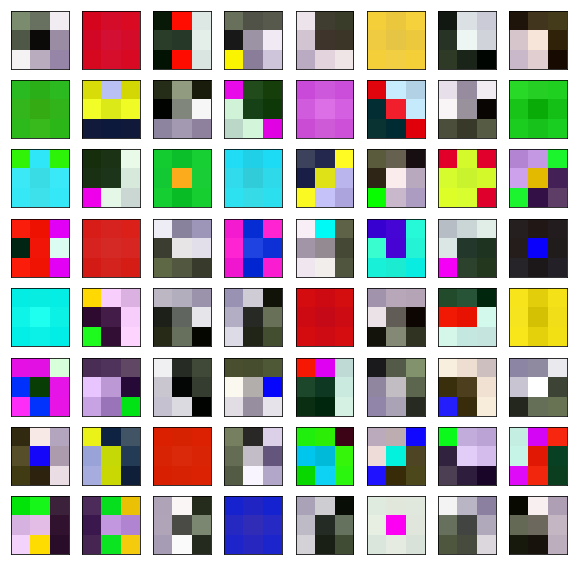

In [44]:
vgg.restore_par('./CHECKPOINTS/1/vgg-net/')
W1_1 = np.rollaxis(vgg.sess.run(vgg.W1_1), -1)
show_w1(W1_1)

In [63]:
xsample = xvalid[2:3, :, :, :]
cv2.imwrite('xsample.png', xsample[0])

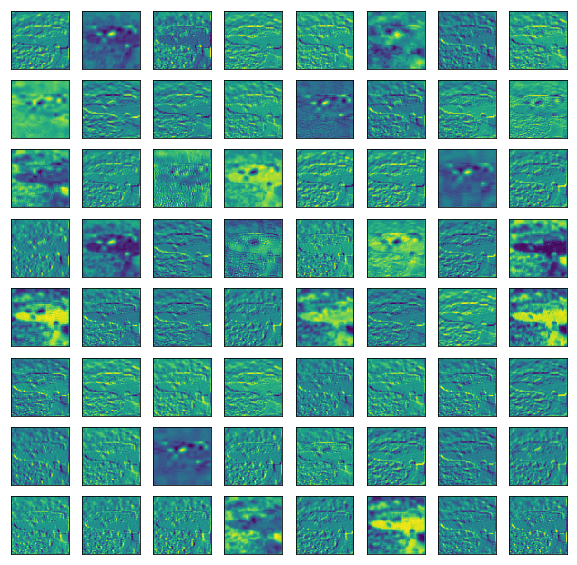

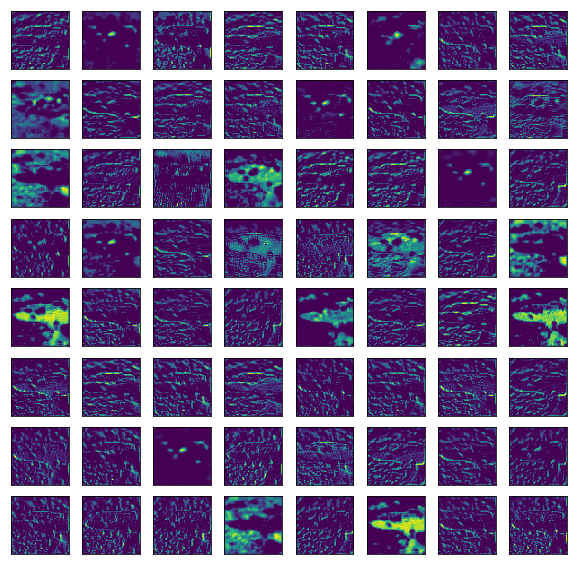

In [72]:
output1_1 = np.rollaxis(vgg.sess.run(vgg.conv3_64, {vgg.x: xsample}), -1)
output1_1_relu = np.rollaxis(vgg.sess.run(vgg.conv3_64_relu, {vgg.x: xsample}), -1)
show_output(output1_1)
show_output(output1_1_relu)

INFO:tensorflow:Restoring parameters from ./CHECKPOINTS/2/vgg-net/model.ckpt
----------weights initialized---------


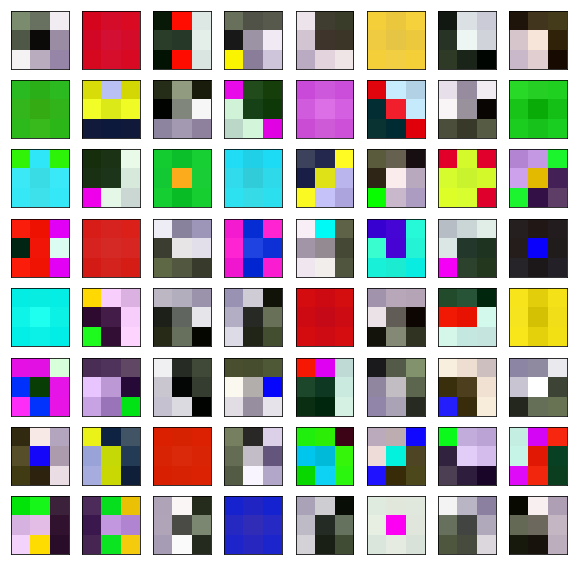

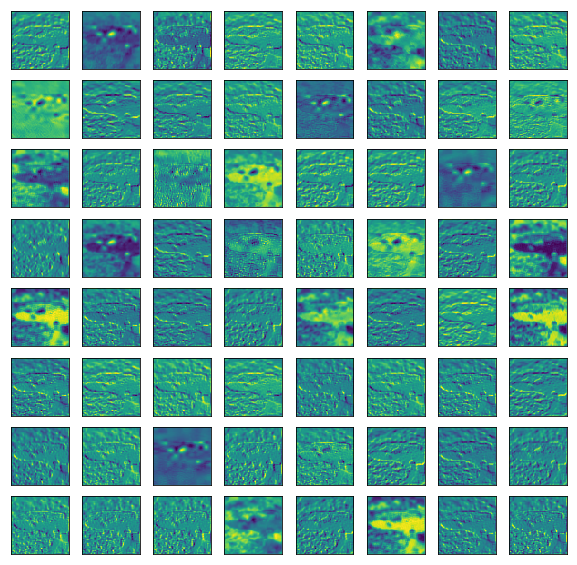

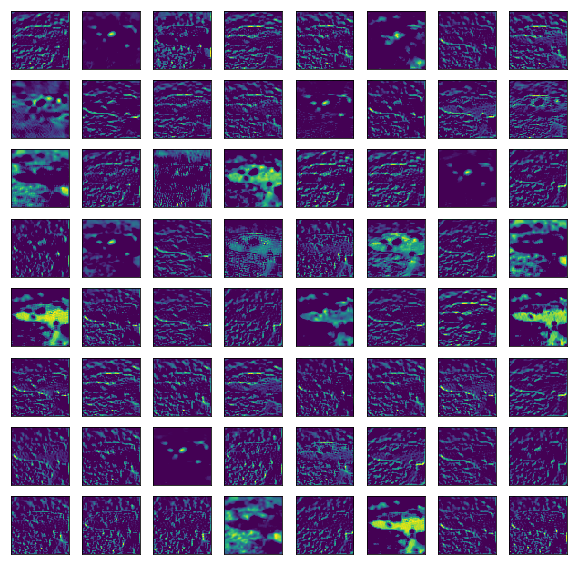

In [73]:
vgg.restore_par('./CHECKPOINTS/2/vgg-net/')
W1_1 = np.rollaxis(vgg.sess.run(vgg.W1_1), -1)
show_w1(W1_1)
output1_1 = np.rollaxis(vgg.sess.run(vgg.conv3_64, {vgg.x: xsample}), -1)
output1_1_relu = np.rollaxis(vgg.sess.run(vgg.conv3_64_relu, {vgg.x: xsample}), -1)
show_output(output1_1)
show_output(output1_1_relu)

INFO:tensorflow:Restoring parameters from ./CHECKPOINTS/3/vgg-net/model.ckpt
----------weights initialized---------


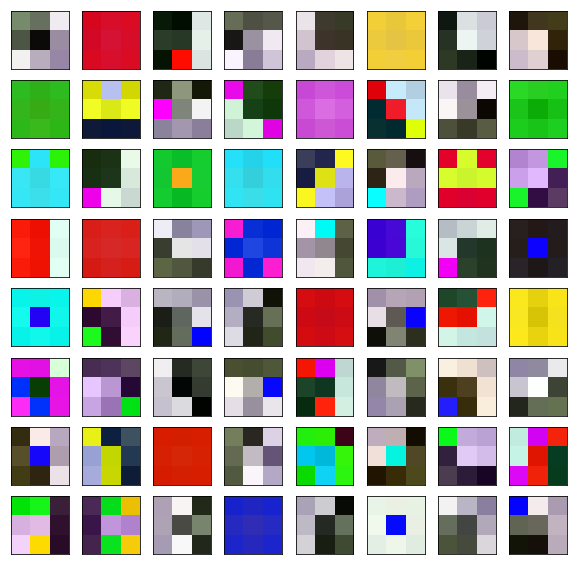

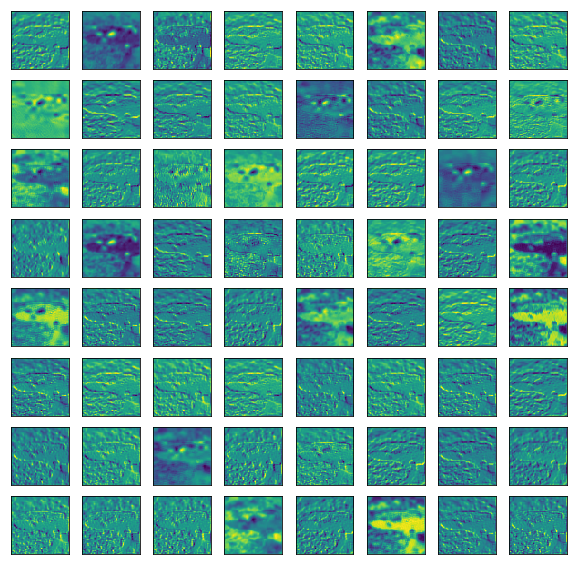

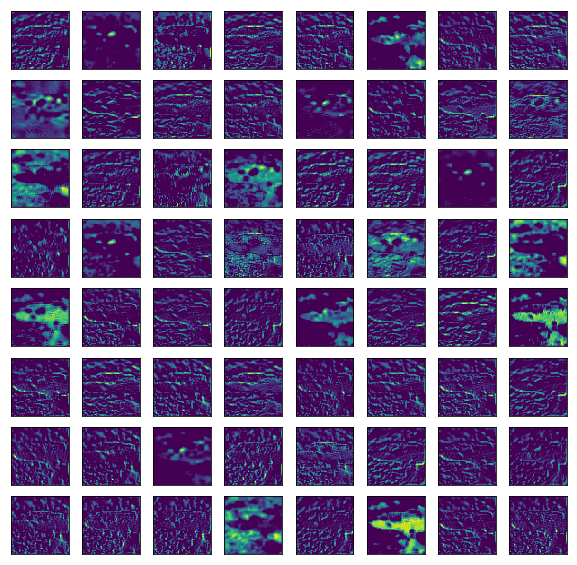

In [74]:
vgg.restore_par('./CHECKPOINTS/3/vgg-net/')
W1_1 = np.rollaxis(vgg.sess.run(vgg.W1_1), -1)
show_w1(W1_1)
output1_1 = np.rollaxis(vgg.sess.run(vgg.conv3_64, {vgg.x: xsample}), -1)
output1_1_relu = np.rollaxis(vgg.sess.run(vgg.conv3_64_relu, {vgg.x: xsample}), -1)
show_output(output1_1)
show_output(output1_1_relu)

INFO:tensorflow:Restoring parameters from ./CHECKPOINTS/5/vgg-net/model.ckpt
----------weights initialized---------


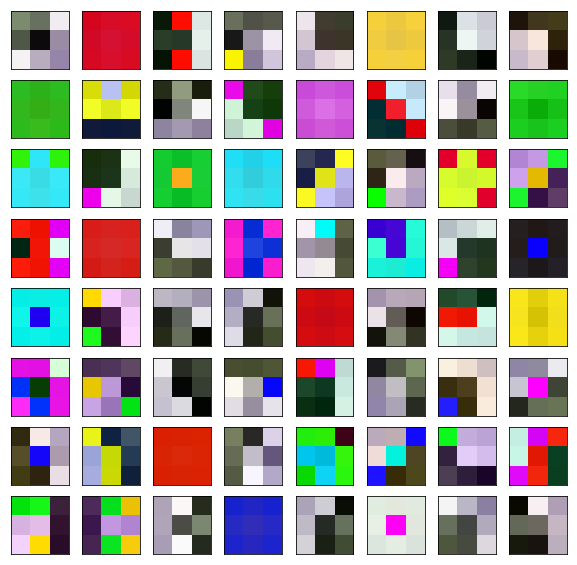

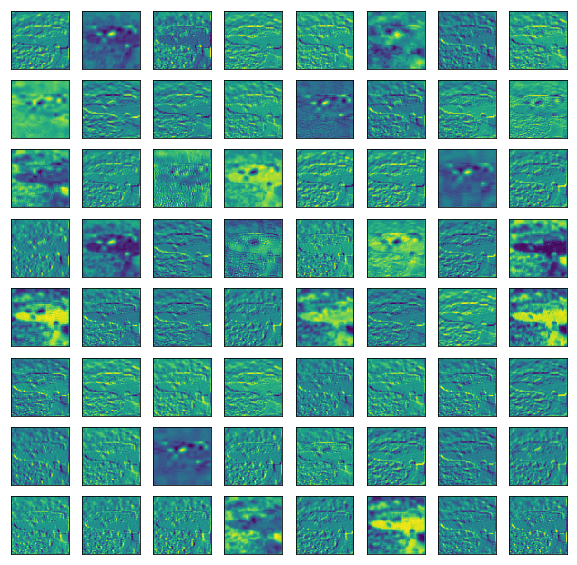

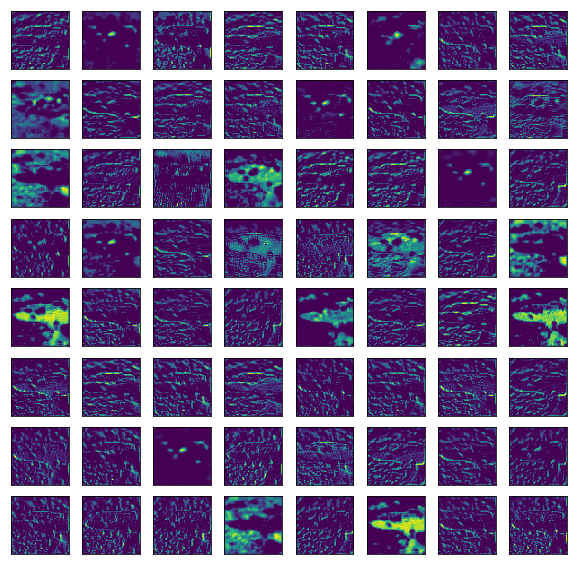

In [75]:
vgg.restore_par('./CHECKPOINTS/5/vgg-net/')
W1_1 = np.rollaxis(vgg.sess.run(vgg.W1_1), -1)
show_w1(W1_1)
output1_1 = np.rollaxis(vgg.sess.run(vgg.conv3_64, {vgg.x: xsample}), -1)
output1_1_relu = np.rollaxis(vgg.sess.run(vgg.conv3_64_relu, {vgg.x: xsample}), -1)
show_output(output1_1)
show_output(output1_1_relu)

## Training from scratch

INFO:tensorflow:Restoring parameters from /s/red/a/nobackup/vision/jason/Projects/vgg-net/


NotFoundError: Key scratch/Variable_10 not found in checkpoint
	 [[Node: save/RestoreV2_15 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save/Const_0_0, save/RestoreV2_15/tensor_names, save/RestoreV2_15/shape_and_slices)]]

Caused by op 'save/RestoreV2_15', defined at:
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-6bfb539117c4>", line 1, in <module>
    vgg_s = VGGNet_s()
  File "<ipython-input-3-1bdb3685ba99>", line 157, in __init__
    self.saver = tf.train.Saver()
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1139, in __init__
    self.build()
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1170, in build
    restore_sequentially=self._restore_sequentially)
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 691, in build
    restore_sequentially, reshape)
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 407, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 247, in restore_op
    [spec.tensor.dtype])[0])
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/tensorflow/python/ops/gen_io_ops.py", line 640, in restore_v2
    dtypes=dtypes, name=name)
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/s/chopin/k/grad/zhixian/.conda/envs/py35_nogpu/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Key scratch/Variable_10 not found in checkpoint
	 [[Node: save/RestoreV2_15 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save/Const_0_0, save/RestoreV2_15/tensor_names, save/RestoreV2_15/shape_and_slices)]]
